<a href="https://colab.research.google.com/github/alina-bogdanovskaya/ML_in_Business_Mar2023/blob/lesson1/Copy_of_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/GB/ML in business/Lection1-20220325T130050Z-001/Lection1/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
#Ваш код здесь
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [7]:
df.gender.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Male      50.48%
Female    49.52%
Name: gender, dtype: object

In [9]:
counts = df.gender.value_counts()
percent = df.gender.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
gen_df = pd.concat([counts, percent], axis=1, keys=['count', 'percentage'])
gen_df

,count,percentage
Male,3555,50.48%
Female,3488,49.52%


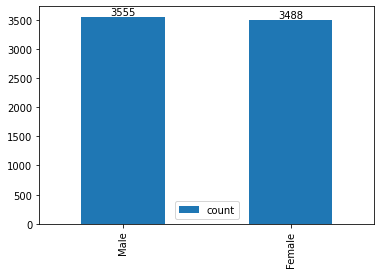

In [12]:
ax = gen_df.plot.bar()
ax.bar_label(ax.containers[0]);

##### 2. Какое количество уникальных значений у поля InternetService?

In [13]:
#Ваш код здесь
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
counts = df.InternetService.value_counts()
percent = df.InternetService.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
IS_df = pd.concat([counts, percent], axis=1, keys=['count', 'percentage'])
IS_df

,count,percentage
Fiber optic,3096,43.96%
DSL,2421,34.37%
No,1526,21.67%


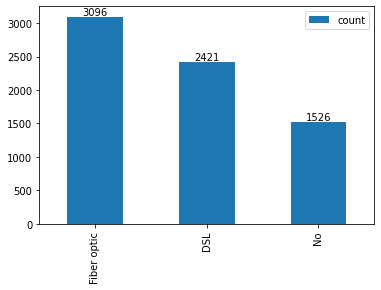

In [15]:
ax = IS_df.plot.bar()
ax.bar_label(ax.containers[0]);

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [16]:
#Ваш код здесь
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

*Чтобы получить статистики по колонке, необходимо перевести строковые данные в числовые*

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [17]:
#Ваш код здесь
df.PhoneService.replace(['Yes', 'No'], [1, 0], inplace=True)

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [18]:
#Ваш код здесь
df.loc[df.TotalCharges == ' ', ['TotalCharges']] = np.nan
df.TotalCharges = df.TotalCharges.astype('float32').fillna(0)

In [19]:
df.TotalCharges.describe()

count    7043.000000
mean     2279.734375
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [20]:
#Ваш код здесь
df.Churn = df.Churn.map({'Yes': 1, 'No': 0})

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [21]:
#Ваш код здесь
cols = ['StreamingMovies', 'StreamingTV', 'TechSupport']
for col in cols:
  df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

##### 8. Заполните пропуски в поле PhoneService значением 0

In [22]:
#Ваш код здесь
df.PhoneService = df.PhoneService.fillna(0)

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [23]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь
df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [24]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df[target], test_size=0.25, random_state=13)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [26]:
#Ваш код здесь
gender.fit_transform(X_train)

,gender_Female,gender_Male
2374,0,1
5908,0,1
6565,0,1
5724,0,1
2957,1,0
...,...,...
866,0,1
2790,1,0
74,1,0
6320,1,0


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

*Нормирование и центрирование облегдает сравнение данных между собой*

In [27]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

In [28]:
tenure.fit_transform(X_train)

array([[-1.25215784],
       [-1.29309024],
       [ 1.16285361],
       ...,
       [-1.21122544],
       [-0.10605071],
       [ 0.13954367]])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [29]:
#Ваш код здесь
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [30]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [31]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [33]:
#Ваш код здесь
y_pred = pipeline.predict_proba(X_test)
y_pred

array([[1.  , 0.  ],
       [0.95, 0.05],
       [0.51, 0.49],
       ...,
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.86, 0.14]])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [34]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
print(f'roc auc score: {roc_auc_score(y_true=y_test, y_score=y_pred[:,1])}')
print(f'log loss score: {log_loss(y_true=y_test, y_pred=y_pred[:,1])}')

roc auc score: 0.772351617248376
log loss score: 0.7868903056473456


### Сохраним наш пайплайн

In [35]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)